In [ ]:
import cv2
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

#1.1

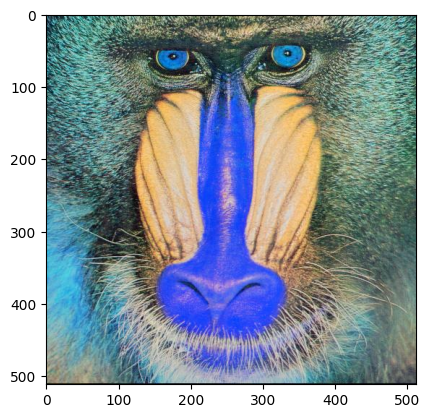

In [ ]:
I = cv2.imread("mandril.jpg")
plt.imshow(I)

In [ ]:
#saving to file
cv2.imwrite("m.png",I)

True

In [ ]:
print(I.shape) # dimensions /rows, columns, depth/
print(I.size) # number of bytes
print(I.dtype) # data type

(512, 512, 3)
786432
uint8


#1.2

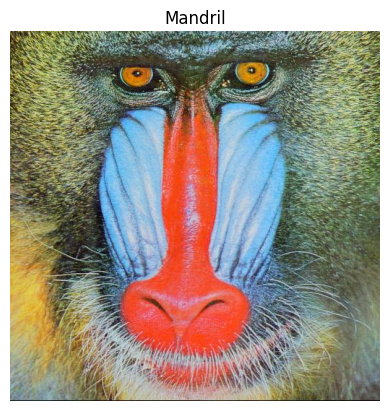

In [ ]:
I_RGB = plt.imread("mandril.jpg")
plt.figure(1) # create figure
plt.imshow(I_RGB) # add image
plt.title("Mandril") # add title
plt.axis("off") # disable display of the coordinate system
plt.show() # display

In [ ]:
plt.imsave("mandril.png",I_RGB)


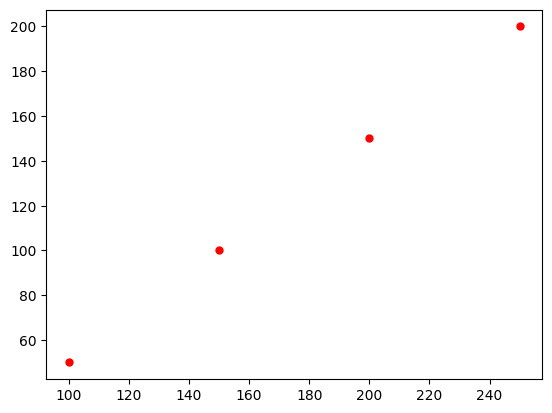

In [ ]:
x = [100, 150, 200, 250]
y = [50, 100, 150, 200]
plt.plot(x,y,"r.",markersize=10)


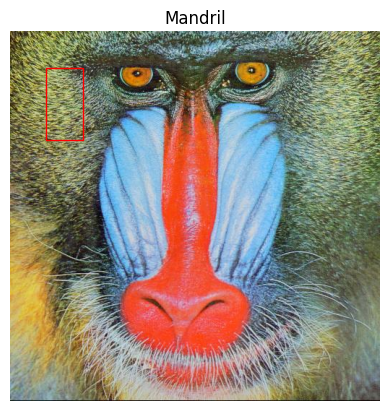

In [ ]:
from matplotlib.patches import Rectangle # add at the top of the file
fig,ax = plt.subplots(1) # instead of plt.figure(1)
plt.figure(1) # create figure
plt.imshow(I_RGB) # add image
plt.title("Mandril") # add title
plt.axis("off") # disable display of the coordinate system
rect = Rectangle((50,50),50,100,fill=False, ec="r"); # ec - edge colour
ax.add_patch(rect) # display
plt.show()

#1.3

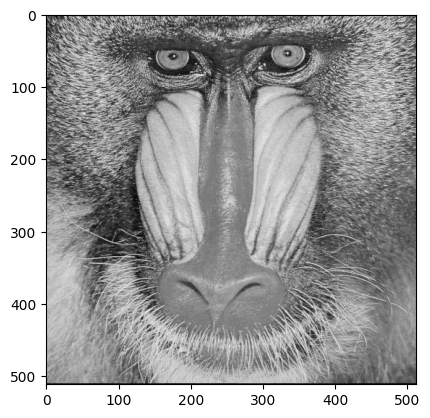

In [ ]:
IG = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(IG)

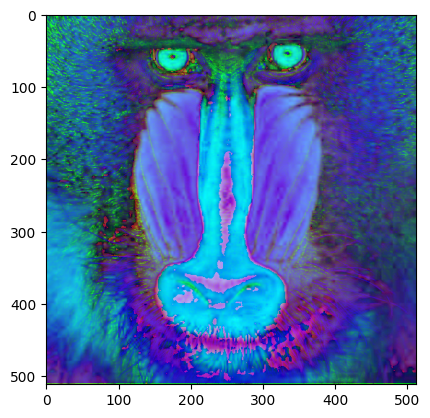

In [ ]:
IHSV = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)
plt.imshow(IHSV)

In [ ]:
IH = IHSV[:,:,0]
IS = IHSV[:,:,1]
IV = IHSV[:,:,2]
print(IH)
print(IS)
print(IV)

[[23 23 22 ... 31 33 33]
 [23 23 21 ... 31 33 33]
 [24 24 22 ... 32 34 34]
 ...
 [84 84 84 ... 13 13 13]
 [79 79 79 ...  8  8  8]
 [76 74 75 ...  8  6  0]]
[[105 205 255 ...  67  51  45]
 [131 143 255 ...  63  60  63]
 [205 117 224 ... 117 112 135]
 ...
 [ 27  27  32 ...  25  26  26]
 [ 28  29  32 ...  33  34  35]
 [228 255 255 ... 200 255 255]]
[[163  76  54 ... 122 154 174]
 [132 112  49 ... 138 149 142]
 [ 87 142  66 ...  94 100  83]
 ...
 [152 152 150 ...  91  88  88]
 [155 148 137 ...  86  83  81]
 [ 19  15  12 ...  14  10   7]]


#1.4

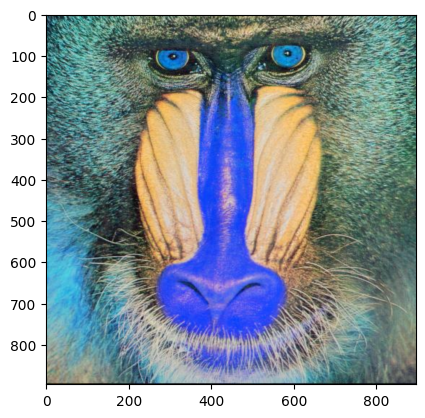

In [ ]:
height, width = I.shape[:2] # retrieving elements 1 and 2, i.e. the corresponding height and width
scale = 1.75 # scale factor
Ix2 = cv2.resize(I, (int(scale*height),int(scale*width)))
plt.imshow(Ix2)

#1.5

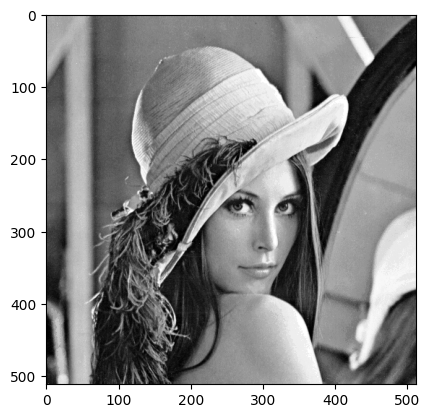

In [ ]:
I_Lena = cv2.imread("lena.png")
I_Lena_gray = cv2.cvtColor(I_Lena, cv2.COLOR_BGR2GRAY)
plt.gray()
plt.imshow(I_Lena_gray)

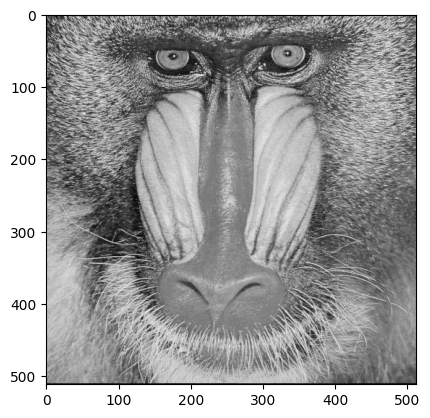

In [ ]:
I_mandryl = cv2.imread("mandril.jpg")
I_mandryl_gray = cv2.cvtColor(I_mandryl, cv2.COLOR_BGR2GRAY)
plt.gray()
plt.imshow(I_mandryl_gray)

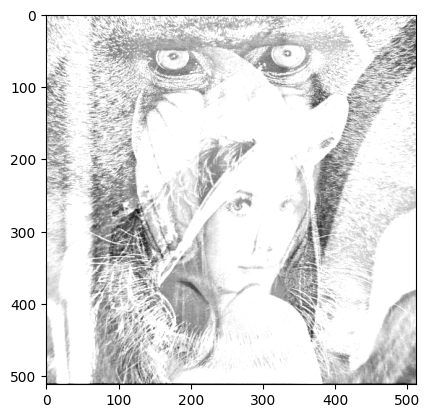

In [ ]:
I_added = cv2.add(I_Lena_gray, I_mandryl_gray)
plt.imshow(I_added)

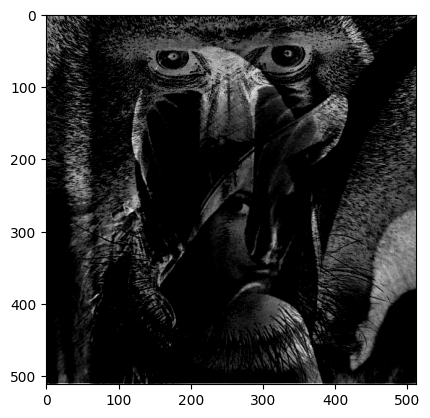

In [ ]:
I_sub = cv2.subtract(I_Lena_gray, I_mandryl_gray)
plt.imshow(I_sub)

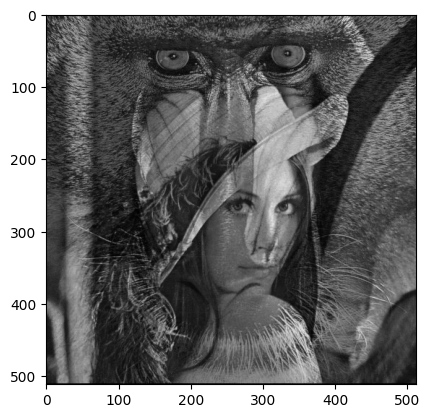

In [ ]:
I_multiply = cv2.multiply(I_Lena_gray.astype('float64'), I_mandryl_gray.astype('float64'))
I_multiply = (I_multiply / 255).astype('uint8')
plt.imshow(I_multiply)

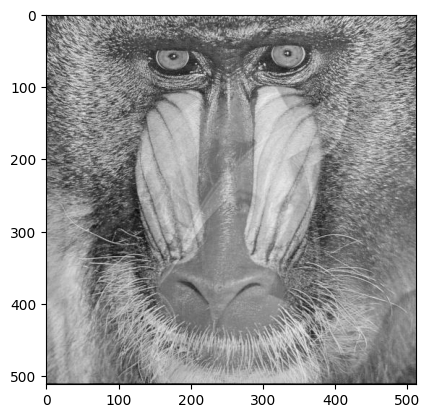

In [ ]:
I_weigted = cv2.addWeighted(I_Lena_gray, 0.2, I_mandryl_gray, 0.8, 0.0)
plt.imshow(I_weigted)

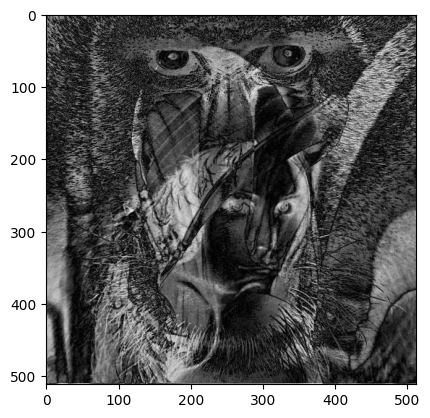

In [ ]:
I_sub2 = cv2.subtract(I_Lena_gray.astype('int16'), I_mandryl_gray.astype('int16'))
I_sub2 = np.abs(I_sub2).astype('uint8')
plt.imshow(I_sub2)

#1.6

Text(0.5, 1.0, 'Histogram obrazu po wyrównianiu')

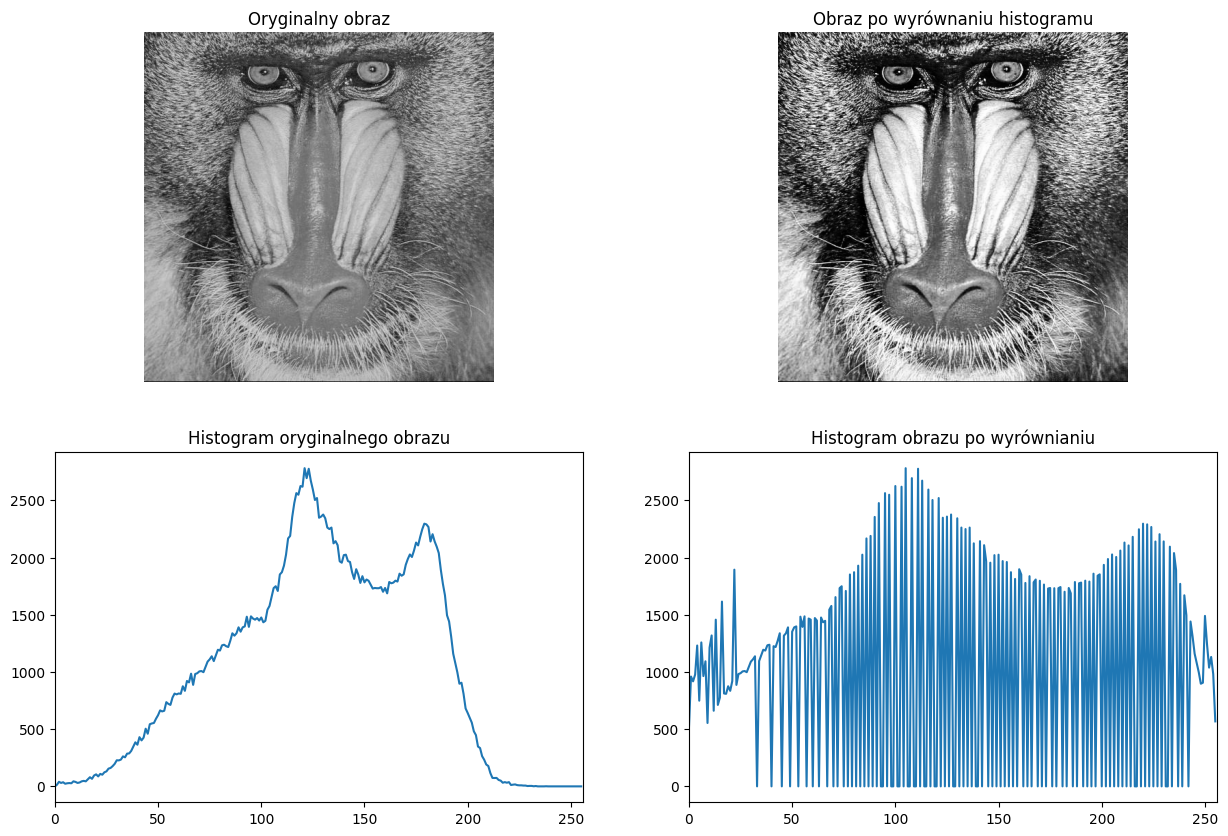

In [ ]:
hist = cv2.calcHist([IG],[0],None,[256],[0,256])
IGE = cv2.equalizeHist(IG)
hist_equalized = cv2.calcHist([IGE],[0],None,[256],[0,256])

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].imshow(IG, cmap='gray', vmin=0, vmax=255)
axs[0, 0].axis('off')
axs[0, 0].set_title('Oryginalny obraz')

axs[1, 0].plot(hist)
axs[1, 0].set_xlim([0, 256])
axs[1, 0].set_title('Histogram oryginalnego obrazu')

axs[0, 1].imshow(IGE, cmap='gray', vmin=0, vmax=255)
axs[0, 1].axis('off')
axs[0, 1].set_title('Obraz po wyrównaniu histogramu')

axs[1, 1].plot(hist_equalized)
axs[1, 1].set_xlim([0, 256])
axs[1, 1].set_title('Histogram obrazu po wyrównianiu')

Text(0.5, 1.0, 'Histogram obrazu po wyrównianiu')

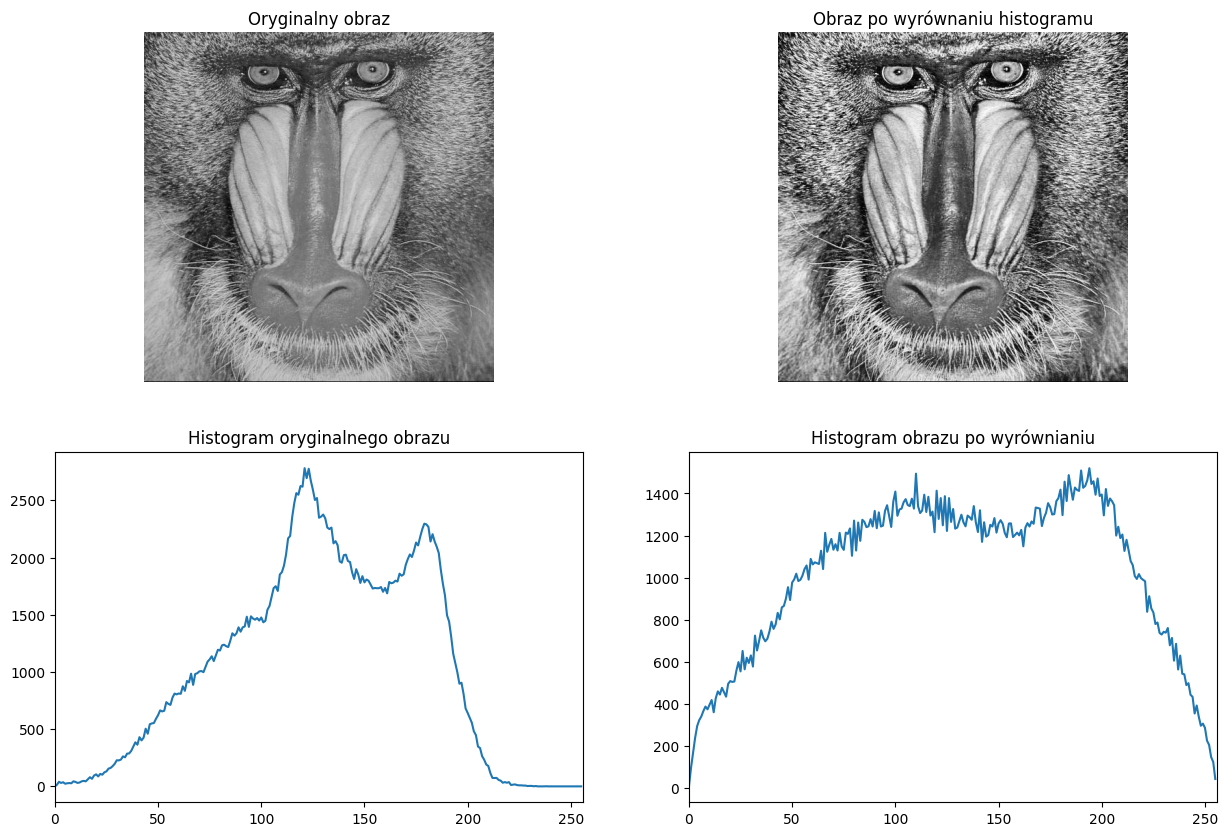

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# clipLimit - maximum height of the histogram bar - values above are distributed among neighbours
# tileGridSize - size of a single image block (local method, operates onseparate image blocks)
I_CLAHE = clahe.apply(IG)
hist_CLAHE = cv2.calcHist([I_CLAHE],[0],None,[256],[0,256])

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].imshow(IG, cmap='gray', vmin=0, vmax=255)
axs[0, 0].axis('off')
axs[0, 0].set_title('Oryginalny obraz')

axs[1, 0].plot(hist)
axs[1, 0].set_xlim([0, 256])
axs[1, 0].set_title('Histogram oryginalnego obrazu')

axs[0, 1].imshow(I_CLAHE, cmap='gray', vmin=0, vmax=255)
axs[0, 1].axis('off')
axs[0, 1].set_title('Obraz po wyrównaniu histogramu')

axs[1, 1].plot(hist_CLAHE)
axs[1, 1].set_xlim([0, 256])
axs[1, 1].set_title('Histogram obrazu po wyrównianiu')

`